# Projet 4 : Réalisez une étude de santé publique avec R ou Python

## Chargement préalable 

Importation des librairies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore') 

Importation des fichiers CSV

In [2]:
popg = pd.read_csv('population.csv')
aide= pd.read_csv('aide_alimentaire.csv')
dispo= pd.read_csv('dispo_alimentaire.csv')
sousnutg= pd.read_csv('sous_nutrition.csv')

## Prétraitement des données

### Population 

Prévisualisation des données 

In [3]:
popg.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


La valeur s'exprime en millier d'habitant

Nous constatons qu'il existe des données pour plusieurs années, or nous ne travaillons que sur l'année 2017. Nous allons donc supprimer les données inutiles 

In [4]:
popg = pd.DataFrame(popg, columns = 
                  ['Zone' , 'Année', 'Valeur']) 

In [5]:
pop= popg[popg['Année'] == 2017]
pop.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


Une fois fait la ligne 'Année' est superflu, nous pouvons donc la supprimer

In [6]:
pop=pop[['Zone', 'Valeur']]
pop.head()

,Zone,Valeur
4,Afghanistan,36296.113
10,Afrique du Sud,57009.756
16,Albanie,2884.169
22,Algérie,41389.189
28,Allemagne,82658.409


Nous allons également observer les statistiques des données 

In [7]:
pop.describe()

,Valeur
count,2.360000e+02
mean,3.198362e+04
std,1.318949e+05
min,7.930000e-01
25%,3.803032e+02
50%,5.203511e+03
75%,1.930842e+04
max,1.421022e+06


Nous observons que sur les 236 lignes du DataFrame il n'y a aucune valeur null

In [8]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 4 to 1414
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    236 non-null    object 
 1   Valeur  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


### Sous-nutrition 

Prévisualisation des données 

In [9]:
sousnutg.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


Les valeurs s'expriment en million de personnes 

Nous constatons qu'il existe des données pour plusieurs fourchettes d'années, or nous ne travaillons que sur l'année 2017. Nous allons donc supprimer les données inutiles et conserver la fourchette 2016-2018

In [10]:
sousnut=sousnutg[ sousnutg['Année']=='2016-2018']
sousnut.head()

,Zone,Année,Valeur
4,Afghanistan,2016-2018,10.5
10,Afrique du Sud,2016-2018,3.1
16,Albanie,2016-2018,0.1
22,Algérie,2016-2018,1.3
28,Allemagne,2016-2018,NaN


Nous pouvons également supprimer la colonne 'Année '

In [11]:
sousnut=sousnut[['Zone', 'Valeur']]
sousnut.head()

,Zone,Valeur
4,Afghanistan,10.5
10,Afrique du Sud,3.1
16,Albanie,0.1
22,Algérie,1.3
28,Allemagne,NaN


Nous constatons que déjà dans la prévisualisation il y a une valeur null. Nous allons donc voir combien il y a de valeur null

In [12]:
sousnut.shape[0] - sousnut.count()

Zone       0
Valeur    99
dtype: int64

   Il y a 99 valeurs manquantes 

In [13]:
sousnut.describe()

,Zone,Valeur
count,203,104
unique,203,50
top,Afghanistan,<0.1
freq,1,20


Il y a 203 lignes dans le Dataframe, si nous prenons en compte les 99 données manquantes :

In [14]:
ine= round((sousnut['Valeur'].isnull().sum()*100)/len(sousnut),2)

In [15]:
print('Il y a',ine,'% de valeur manquantes ')

Il y a 48.77 % de valeur manquantes 


Faisons la liste des pays où la valeur est manquante

In [16]:
valnul=sousnut.dropna()

In [17]:
diff = pd.concat([valnul,sousnut]).drop_duplicates(keep=False)

In [18]:
diff.Zone.unique()

array(['Allemagne', 'Andorre', 'Antigua-et-Barbuda', 'Australie',
       'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Bélarus',
       'Belgique', 'Bermudes', 'Bhoutan', 'Bosnie-Herzégovine', 'Brésil',
       'Brunéi Darussalam', 'Burundi', 'Canada',
       'Chine - RAS de Hong-Kong', 'Chine, continentale', 'Comores',
       'Croatie', 'Cuba', 'Danemark', 'Djibouti', 'Érythrée', 'Espagne',
       'Estonie', "États-Unis d'Amérique", 'Fédération de Russie',
       'Finlande', 'France', 'Grèce', 'Grenade', 'Groenland', 'Guinée',
       'Guinée équatoriale', 'Guinée-Bissau', 'Hongrie', 'Îles Cook',
       'Îles Marshall', 'Irlande', 'Islande', 'Israël', 'Italie', 'Japon',
       'Kazakhstan', 'Koweït', 'Lettonie', 'Libye', 'Lituanie',
       'Luxembourg', 'Maldives', 'Malte', 'Micronésie (États fédérés de)',
       'Monténégro', 'Nauru', 'Niger', 'Nioué', 'Norvège',
       'Nouvelle-Zélande', 'Ouganda', 'Palaos', 'Palestine',
       'Papouasie-Nouvelle-Guinée', 'Pays-Bas', 'Pologne', 

Nous constatons que dans les valeurs manquantes, il y a d'une part les pays industrialisés où la sous nutrition est supposée inexistante, et d'autre part les pays en grande difficultés ou en guerre où la situation est probablement problématique.

In [19]:
sousnut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 4 to 1216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    203 non-null    object
 1   Valeur  104 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


La valeur devrait être afficher dans un type numérique, voyons les données présentes

In [20]:
sousnut.Valeur.unique()

array(['10.5', '3.1', '0.1', '1.3', nan, '5.8', '1.6', '1.5', '<0.1',
       '21.5', '0.8', '1.7', '0.5', '0.2', '3.6', '2.4', '0.6', '0.9',
       '2.7', '1.4', '4.9', '4.6', '0.3', '21.1', '2', '5.3', '190.1',
       '23.6', '3.9', '9', '11.9', '0.4', '1.8', '1', '3.3', '8.4', '9.4',
       '7.3', '1.1', '22.8', '24.8', '2.2', '15.7', '12', '13.4', '4.2',
       '5', '5.7', '6.2', '8', '6.5'], dtype=object)

Nous constatons qu'il y a "<0.1" (fin de première ligne), il faut donc supprimer ce symbole pour changer le type de donné. Nous allons convertir un <0.1 en 0.05 est une approximation qui parait acceptable 

In [21]:
sousnut.loc[sousnut['Valeur']=='<0.1','Valeur']='0.05'

sousnut.replace('<0.1','0.05',inplace=True,regex = True)

In [22]:
sousnut = sousnut.astype({"Zone": object, "Valeur": float})
sousnut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 4 to 1216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    203 non-null    object 
 1   Valeur  104 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


### Disponibilité Alimentaire 

Prévisualisation des données 

In [23]:
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


   L'unité de valeur est précisé dans chaque collone, une erreur toutefois concernant 'Disponibilité alimentaire (Kcal/personne/jour)' la valeur n'est pas exprimé en Kcal mais en calorie (cf le document "lexique de donnée") pour corriger cela soit en modifiant les valeurs pour correspondre au titre soit modifier le titre. Modifier le titre me paraît plus simple et plus pertinent

In [24]:
dispo.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)': 'Disponibilité alimentaire (Cal/personne/jour)'}, inplace=True)
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Cal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


Nous pouvons avoir une visualisation du nombre de valeur null par catégorie 

In [25]:
dispo.isnull().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Cal/personne/jour)                     1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

Nous constatons que DataFrame original est riche en données, et décompose la disponibilité alimentaire en plusieurs catégorie d'aliments. Les données null dans chaque catégorie sont acceptable. Nous pourrions créer un DataFrame simplifié, comme par exemple une disponibilité alimentaire en Calories journalière individuel par Zone.

In [26]:
dispopays=dispo.groupby(['Zone'])['Disponibilité alimentaire (Cal/personne/jour)'].agg('sum')
dispopays=pd.DataFrame(dispopays) 
dispopays.head()

,Disponibilité alimentaire (Cal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0


  Ce DataFrame offre une vision simplifiée de la disponibilité alimentaire qui permet de se faire un avis général sur la situation mondiale. Que l'on peut également globaliser avec :

In [27]:
dispopays.describe()

,Disponibilité alimentaire (Cal/personne/jour)
count,174.000000
mean,2847.367816
std,438.546907
min,1879.000000
25%,2530.250000
50%,2830.500000
75%,3186.000000
max,3770.000000


Bien évidemment le DataFrame "dispopays" n'est qu'un aperçu globale de la situation alimentaire 

### Aide Alimentaire 

In [28]:
aide.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


La valeur est exprimée en tonne 

Voyons quelle Année est présente sur ce document 

In [29]:
aide.Année.unique()

array([2013, 2014, 2015, 2016], dtype=int64)

## Première demande : la proportion de personnes en état de sous-nutrition 

In [30]:
poptotal=int(1000*pop['Valeur'].sum())
popred=poptotal/1000000000
print ("En 2017, nous estimons qu'il y avait ",popred,"habitants sur l'ensemble de la planète")

En 2017, nous estimons qu'il y avait  7.548134111 habitants sur l'ensemble de la planète


Compte tenu du nombre de Valeurs manquantes dans les données de sous nutrition nous pouvons soit retirer simplement les données manquantes 

#### Méthode 1:Suppression des observations

In [31]:
sndrop=sousnut.dropna() #suppression des données null

In [32]:
sousnuttotal=(1000000*sndrop['Valeur'].sum())
nousnure=round(sousnuttotal/1000000,2)
print ("En 2017, selon nos estimations il y avait ",nousnure," millions habitants en sous nutrition sur les 104 pays référencés disposant d'une valeur ")

En 2017, selon nos estimations il y avait  536.7  millions habitants en sous nutrition sur les 104 pays référencés disposant d'une valeur 


In [33]:
taux= round( (sousnuttotal*100)/poptotal,2)
print ("En 2017, il y avait ",taux," % d'humain en sous nutrition sur l'ensemble des données non null soit 104 données")

En 2017, il y avait  7.11  % d'humain en sous nutrition sur l'ensemble des données non null soit 104 données


#### Méthode 2: Imputation de données (médian)

Nous pouvons également utiliser la méthode d'imputation soit par la moyenne soit la valeur médian. Commençons par la valeur médian.

In [34]:
median = sousnut['Valeur'].median() # calcul de la médiane 
snmed=sousnut.fillna(median) # remplacement des valeurs null

In [35]:
snmedtotal=(1000000*snmed['Valeur'].sum())
snmedred=round(snmedtotal/1000000,2)

In [36]:
print ("En 2017, nous estimons qu'il y avait ",snmedred," millions d'habitants en sous nutrition en appliquant une imputation de la médiane sur les 99 valeurs null")

En 2017, nous estimons qu'il y avait  640.65  millions d'habitants en sous nutrition en appliquant une imputation de la médiane sur les 99 valeurs null


In [37]:
taux= round( (snmedtotal*100)/poptotal,2)
print ("En 2017, il y avait ",taux," % d'humain en sous nutrition sur l'ensemble des données non null soit 203 données")

En 2017, il y avait  8.49  % d'humain en sous nutrition sur l'ensemble des données non null soit 203 données


#### Méthode 3: Imputation de données (moyenne)

In [38]:
moyenne = sousnut['Valeur'].mean() #calcul de la moyenne 
snmoy=sousnut.fillna(moyenne) #remplacement des valeurs null par la moyenne 

In [39]:
snmoytotal=(1000000*snmoy['Valeur'].sum())
snmoyred=round(snmoytotal/1000000000,2)

In [40]:
print ("En 2017, il y avait ",snmoyred," milliard d'habitants en sous nutritionen appliquant une imputation de la moyenne sur les 99 valeurs null")

En 2017, il y avait  1.05  milliard d'habitants en sous nutritionen appliquant une imputation de la moyenne sur les 99 valeurs null


In [41]:
taux= round( (snmoytotal*100)/poptotal,2)
print ("En 2017, il y avait ",taux," % d'humain en sous nutrition sur l'ensemble des données non null soit 203 données")

En 2017, il y avait  13.88  % d'humain en sous nutrition sur l'ensemble des données non null soit 203 données


   Concernant les valeurs null, nous pourrions également observer les années précédentes afin d'établir une projection et le cas échéant observer les données présentent dans le voisinage géographique pour en projeter des données 

Pour conclure D'après nos estimations il y aurait entre  536.7  millions et 1.05  milliard de personnes en sous nutrition en 2017. C'est à dire entre  7.11 %  et 13.88 % de la population mondiale

## Deuxième demande le nombre théorique de personnes qui pourraient être nourries

Calculons la moyenne de la disponibilité alimentaire ainsi que la population mondiale 

In [42]:
moy_dispo=dispopays['Disponibilité alimentaire (Cal/personne/jour)'].mean()
poptotal=(pop['Valeur']*1000).sum()

D'après l'Organisation mondiale de la Santé, un homme doit consommer environ 2 500 kilocalories (Cal) par jour, contre 2 000 Cal/jour pour une femme. Nous allons donc prendre la donné la plus élevé soit 2500 Cal)

Multiplions cette moyenne par la population mondiale et considérons une valeur de 2500 Calories par personne.

In [43]:
dispotheo=round((moy_dispo*poptotal)/2500)
theored=round((dispotheo/1000000000),2)
theorel=round((dispotheo*100)/poptotal,2)
print('Théoriquement il est possible de nourrir ',theored,' milliards de personnes soit',theorel,'% de la population actuelle')

Théoriquement il est possible de nourrir  8.6  milliards de personnes soit 113.89 % de la population actuelle


## Troisième demande: la disponibilité alimentaire des produits végétaux

Appliquons un filtre afin de ne conserver que les produits végétaux

In [44]:
dispovege=dispo[ dispo['Origine'] == 'vegetale' ] #Application du filtre

In [45]:
dispopaysvege=dispovege.groupby(['Zone'])['Disponibilité alimentaire (Cal/personne/jour)'].agg('sum')
dispopaysvege=pd.DataFrame(dispopaysvege) 

In [46]:
moy_dispovege=dispopaysvege['Disponibilité alimentaire (Cal/personne/jour)'].mean()

In [47]:
dispotheov=round((moy_dispovege*poptotal)/2500)
theovred=round((dispotheov/1000000000),2)
print('Théoriquement il est possible de nourrir ',theovred,' milliards de personnes si on ne compte que les aliments végétaux')

Théoriquement il est possible de nourrir  6.92  milliards de personnes si on ne compte que les aliments végétaux


## Quatrième demande: utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine

In [48]:
animaux= dispo['Aliments pour animaux'].sum() #somme de la consommation de l'alimentation animale

In [49]:
expo=dispo['Exportations - Quantité'].sum() #somme de l'exportation

In [50]:
nour=dispo['Nourriture'].sum() #somme de la consommation de l'alimentation humaine

In [51]:
perte=dispo['Pertes'].sum() #somme des pertes 

In [52]:
sem=dispo['Semences'].sum() #somme de la consommation pour les semences 

In [53]:
autre=dispo['Autres Utilisations'].sum()

In [54]:
trait=dispo['Traitement'].sum()

#### Représentation graphique de la répartition de la consommation intérieure 

In [55]:
plt.figure(figsize=(50,50)) #préparation des dimensions

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

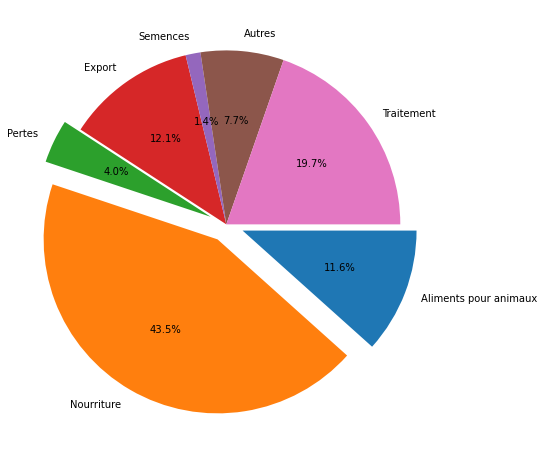

In [56]:
plt.figure(figsize=(8,8))
x = np.array([animaux, nour ,perte,expo, sem,autre,trait])
label =['Aliments pour animaux', 'Nourriture','Pertes', 'Export', 'Semences','Autres','Traitement']
plt.pie(x, labels=list(label), counterclock=False, autopct='%1.1f%%' ,explode=(0.1, 0.1, 0.1, 0,0,0,0))
plt.show()

#### Répartiton de la consommation des céréales 

Avant tout observons la liste des produits existants 

In [57]:
dispovege.Produit.unique()

array(['Agrumes, Autres', 'Aliments pour enfants', 'Ananas', 'Bananes',
       'Bière', 'Blé', 'Boissons Alcooliques', 'Café',
       'Coco (Incl Coprah)', 'Céréales, Autres', 'Dattes',
       'Edulcorants Autres', 'Feve de Cacao', 'Fruits, Autres',
       'Graines de coton', 'Graines de tournesol',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Légumes, Autres', 'Légumineuses Autres',
       'Maïs', 'Miel', 'Millet', 'Miscellanees', 'Noix', 'Olives',
       'Oranges, Mandarines', 'Orge', 'Plantes Oleiferes, Autre',
       'Poivre', 'Pommes', 'Pommes de Terre', 'Raisin',
       'Riz (Eq Blanchi)', 'Sucre Eq Brut', 'Sucre, betterave',
       'Sucre, canne', 'Sésame', 'Thé', 'Tomates', 'Vin',
       'Épices, Autres', 'Alcool, non Comestible',
       'Arachides Decortiquees', 'Avoine', 'Bananes plantains',
       'Bo

Appliquons un filtre afin de ne conserver que les céréales 

In [58]:
cere=['Seigle', 'Maïs','Blé','Céréales, Autres','Millet','Orge','Sésame','Avoine','Seigle','Sorgho','Graines Colza/Moutarde',
      'Riz (Eq Blanchi)']
cereale= dispovege[dispovege.Produit.isin(cere)]

Faisons la somme des deux données nous interessant afin de calculer la proportion.

In [59]:
totalcere=cereale['Nourriture'].sum()+cereale['Aliments pour animaux'].sum()

In [60]:
cereale_nour=cereale['Nourriture'].sum()
taux_nour=round((cereale_nour*100)/totalcere,2)
print("L'alimentation humaine représente ",taux_nour,"% de la consommation ")

L'alimentation humaine représente  53.97 % de la consommation 


In [61]:
cereale_ani=cereale['Aliments pour animaux'].sum()
taux_ani=round((cereale_ani*100)/totalcere,2)
print("L'alimentation animale représente ",taux_ani,"% de la consommation ")

L'alimentation animale représente  46.03 % de la consommation 


Faisons un graphique circulaire pour imager ces proportions

In [62]:
plt.figure(figsize=(50,50)) #préparation des dimensions

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

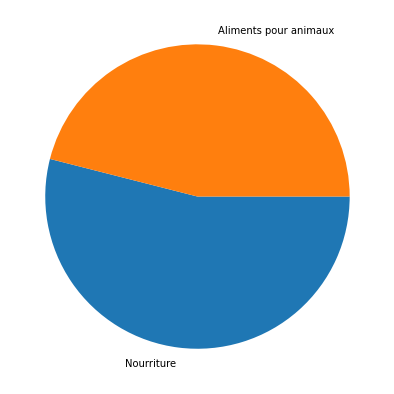

In [63]:
plt.figure(figsize=(7,7))
x = np.array([cereale_nour,cereale_ani])
label =['Nourriture','Aliments pour animaux' ]
plt.pie(x, labels=list(label), counterclock=False, explode=(0, 0))
plt.show()

A présent remettons ces 2 donnés en perspective avec les autres utilisations des céréales 

In [64]:
expo_cere=cereale['Exportations - Quantité'].sum() #somme de l'exportation

In [65]:
perte_cere=cereale['Pertes'].sum() #somme des pertes 

In [66]:
sem_cere=cereale['Semences'].sum() #somme de la consommation pour les semences 

In [67]:
autre_cere=cereale['Autres Utilisations'].sum()

In [68]:
trait_cere=cereale['Traitement'].sum()

Puis une représentation graphique 

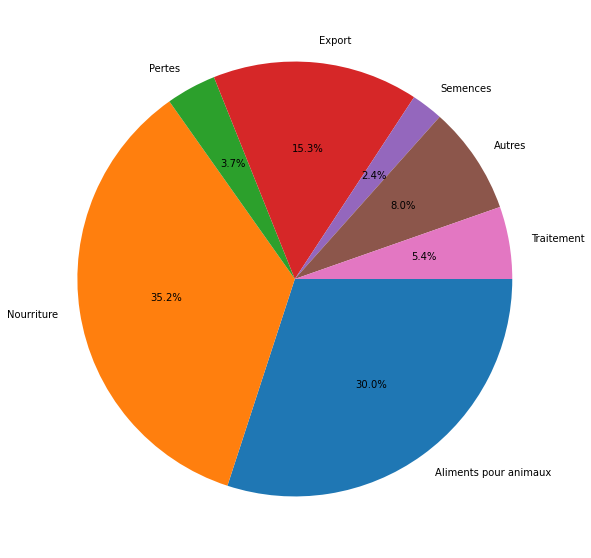

In [69]:
plt.figure(figsize=(10,10))
x = np.array([cereale_ani, cereale_nour ,perte_cere,expo_cere, sem_cere,autre_cere,trait_cere])
label =['Aliments pour animaux', 'Nourriture','Pertes', 'Export', 'Semences','Autres','Traitement']
plt.pie(x, labels=list(label), counterclock=False, autopct='%1.1f%%' ,explode=(0, 0, 0, 0,0,0,0))
plt.show()

#### Utilisation du manioc en Thailand

In [70]:
 #Application du filtre
thai=dispo[(dispo['Zone'] == 'Thaïlande')]

In [71]:
thaimanio=thai[thai['Produit']=='Manioc']

In [72]:
snthai=sousnut[sousnut['Zone']=='Thaïlande']

####  Calcul du nombre potentiel de personne nourri par le manioc exporté

Calcul de la disponibilité alimentaire annuel en Calorie/personne/an du manioc

In [73]:
thaimanio.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Cal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


Après recherche, le manioc a un apport énergétique de 159 calories pour 100g soit 1590 par kg où 1 590 000 la tonne.

Calculons l'équivalent énergétique exporté concernant le manioc

In [74]:
calton=1590000
calexp=calton*thaimanio['Exportations - Quantité']

Nous venons de calculer l'équivalent calorique exporté annuellement, voyons combien de personnes peuvent être nourrit quotidiennement

In [75]:
caljour=round(calexp/(365*2500))


In [76]:
print('Le manioc exporté pourrait nourrir','{:0}'.format(caljour.iloc[0]),'personnes')

Le manioc exporté pourrait nourrir 43935.0 personnes


#### Exportation de manioc par rapport aux autres exportations 

In [77]:
exportation = thai[['Produit','Exportations - Quantité']]
exportation.head()


,Produit,Exportations - Quantité
13759,Abats Comestible,5.0
13760,"Agrumes, Autres",6.0
13761,"Alcool, non Comestible",110.0
13762,Aliments pour enfants,7.0
13763,Ananas,1449.0


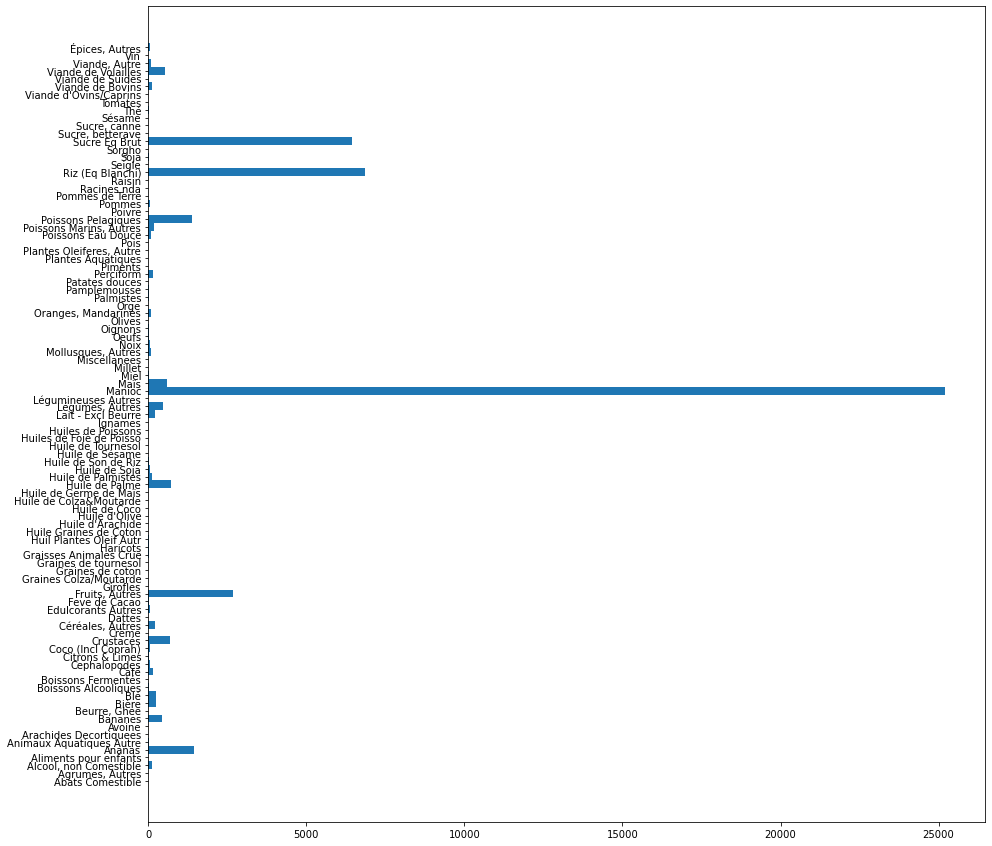

In [78]:
plt.figure(figsize=(15,15))
names = exportation['Produit'] # nom des barres
w=1
values = exportation['Exportations - Quantité']

plt.barh(names, values,w) ; plt.show() # Tracer

#### Proportion du manioc exporté

In [79]:
thaimanexpo=thaimanio['Exportations - Quantité']
thaimanprod=thaimanio['Production']
thaimanimp=thaimanio['Importations - Quantité']

In [80]:
mantaux=round((thaimanexpo*100)/(thaimanprod+thaimanimp),2)/100
print('Le manioc exporté représente','{:.2%}'.format(mantaux.iloc[0]),' du total du manioc présent en Thailande')

Le manioc exporté représente 80.10%  du total du manioc présent en Thailande


#### Evolution et répartition des aides alimentaires

En premier lieu, regroupons les aides par années 

In [81]:
aide2013=aide[aide['Année']==2013]
aide2013=aide2013.copy()
aide2014=aide[aide['Année']==2014]
aide2014=aide2014.copy()
aide2015=aide[aide['Année']==2015]
aide2015=aide2015.copy()
aide2016=aide[aide['Année']==2016]
aide2016=aide2016.copy()

Renommons les colonnes pour éviter les confusions 

In [82]:
aide2013.rename(columns={'Valeur': 'Valeur 2013'}, inplace=True)

In [83]:
aide2014.rename(columns={'Valeur': 'Valeur 2014'}, inplace=True)

In [84]:
aide2015.rename(columns={'Valeur': 'Valeur 2015'}, inplace=True)

In [85]:
aide2016.rename(columns={'Valeur': 'Valeur 2016'}, inplace=True)

Supprimons la colonne 'Année' qui devient obsolète 

In [86]:
aide2013=aide2013[['Pays bénéficiaire', 'Valeur 2013']] # Réduction des entêtes

In [87]:
aide2014=aide2014[['Pays bénéficiaire', 'Valeur 2014']]

In [88]:
aide2015=aide2015[['Pays bénéficiaire', 'Valeur 2015']]

In [89]:
aide2016=aide2016[['Pays bénéficiaire', 'Valeur 2016']]

Agrégation des valeurs par pays

In [90]:
aide2013=aide2013.groupby(['Pays bénéficiaire'])['Valeur 2013'].agg('sum') # Agrégation 

In [91]:
aide2014=aide2014.groupby(['Pays bénéficiaire'])['Valeur 2014'].agg('sum')

In [92]:
aide2015=aide2015.groupby(['Pays bénéficiaire'])['Valeur 2015'].agg('sum')

In [93]:
aide2016=aide2016.groupby(['Pays bénéficiaire'])['Valeur 2016'].agg('sum')

In [94]:
aidetotal=[aide2013, aide2014, aide2015, aide2016]

In [95]:
globaide= reduce(lambda left,right: pd.merge(left,right,on='Pays bénéficiaire',how='outer'), aidetotal) # Fusion 

In [96]:
globaide.isnull().sum()

Valeur 2013     4
Valeur 2014     6
Valeur 2015    16
Valeur 2016    50
dtype: int64

Les aides de 2016 contiennent trop de valeur null, il serait préférable de prendre les aides de 2014 où il y a moins de valeurs null

Renommons la colonne de "Zone" pour qu'elle coincide avec la colonne de Aide2014

In [97]:
aide2014=pd.DataFrame(aide2014)

In [98]:
snt=sndrop.copy()
snt.rename(columns={'Zone':'Pays bénéficiaire'}, inplace=True)

In [99]:
sna=[aide2014,snt]
rateaidesn=reduce(lambda left,right: pd.merge(left,right,on='Pays bénéficiaire',how='outer'), sna) # Fusion 

suppression valeur null

In [100]:
sss=rateaidesn.dropna()

In [101]:
sss.rename(columns={'Pays bénéficiaire': 'Pays','Valeur 2014': 'Aide','Valeur': 'Sous_nutrition'}, inplace=True)

In [102]:
sss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 69
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pays            48 non-null     object 
 1   Aide            48 non-null     float64
 2   Sous_nutrition  48 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [103]:
sss.reset_index(inplace=True)

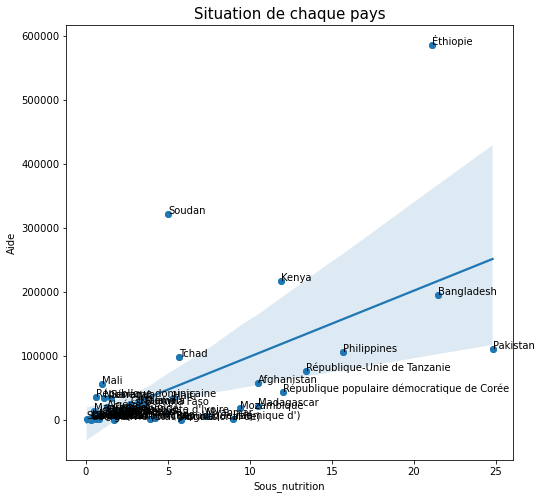

In [104]:
X=sss['Sous_nutrition']
Y=sss['Aide']
annotations=sss['Pays']
plt.figure(figsize=(8,8))
plt.scatter(X,Y)
plt.xlabel("Population en état de sous nutrition "),plt.ylabel("Aide alimentaire en tonne"),plt.title("Situation de chaque pays",fontsize=15)
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
sns.regplot(x = "Sous_nutrition",   y = "Aide",  data = sss) 
plt.show()

Conclusion: Compte tenu de leur niveau de sous-nutrition certain pays perçoivent trop d'aide alimentaire et d'autre pas assez.

#### Pays ayant le taux de sous nutrition le plus élevé 

##### Création d'un tableau avec les données sous-nutrition et population 

In [105]:
test1=[sousnut,pop]

In [106]:
mtest= reduce(lambda left,right: pd.merge(left,right,on='Zone',how='outer'), test1)

In [107]:
mtest.head()

,Zone,Valeur_x,Valeur_y
0,Afghanistan,10.5,36296.113
1,Afrique du Sud,3.1,57009.756
2,Albanie,0.1,2884.169
3,Algérie,1.3,41389.189
4,Allemagne,NaN,82658.409


Comment gérer la différence du nombre de ligne? Suppression de Valeur_x null? Ou remplacer Valeur_x null et suppression Valeur_y null? Je dois calculer un ratio il me faut donc les deux données, je peux donc supprimer toutes les données null. Je dois renommer d'abord les colonneses et appliquer les multiplications dans les données pour avoir les chiffres complets, ajouté une colonne pour y stocker le ratio

In [108]:
mtest.rename(columns={'Valeur_x': 'Sous nutrition', 'Valeur_y': 'Population'}, inplace=True)

In [109]:
mtest.head()

,Zone,Sous nutrition,Population
0,Afghanistan,10.5,36296.113
1,Afrique du Sud,3.1,57009.756
2,Albanie,0.1,2884.169
3,Algérie,1.3,41389.189
4,Allemagne,NaN,82658.409


In [110]:
def pop(x):
    return x*1000

mtest['Population'] = mtest['Population'].transform(pop)

In [111]:
def nut(x):
    return x*1000000

mtest['Sous nutrition'] = mtest['Sous nutrition'].transform(nut)

In [112]:
mtest.head()

,Zone,Sous nutrition,Population
0,Afghanistan,10500000.0,36296113.0
1,Afrique du Sud,3100000.0,57009756.0
2,Albanie,100000.0,2884169.0
3,Algérie,1300000.0,41389189.0
4,Allemagne,NaN,82658409.0


In [113]:
mtest=mtest.dropna()

##### Création d'une colonne pour afficher le taux de sous-nutrition 

In [114]:
mtest['Ratio']=(mtest['Sous nutrition']*100)/mtest['Population']

In [115]:
mtest.head()

,Zone,Sous nutrition,Population,Ratio
0,Afghanistan,10500000.0,36296113.0,28.928718
1,Afrique du Sud,3100000.0,57009756.0,5.437666
2,Albanie,100000.0,2884169.0,3.467203
3,Algérie,1300000.0,41389189.0,3.140917
6,Angola,5800000.0,29816766.0,19.452143


##### Réorganisation du tableau par ordre décroissant 

In [116]:
mtesttri=mtest.sort_values(by=['Ratio'],ascending=False)

In [117]:
mtesttri.head(10)

,Zone,Sous nutrition,Population,Ratio
51,Dominique,50000.0,71458.0,69.971172
78,Haïti,5300000.0,10982366.0,48.259182
157,République populaire démocratique de Corée,12000000.0,25429825.0,47.188685
164,Saint-Vincent-et-les Grenadines,50000.0,109827.0,45.526146
98,Kiribati,50000.0,114158.0,43.798945
108,Madagascar,10500000.0,25570512.0,41.062924
103,Libéria,1800000.0,4702226.0,38.279742
100,Lesotho,800000.0,2091534.0,38.249438
183,Tchad,5700000.0,15016753.0,37.957606
161,Rwanda,4200000.0,11980961.0,35.055619


Nous constatons que plusieurs observations apparaissent car nous avons attribué un nombre "arbitraire " en sous nutrition de 0,05 afin de remplacer le < 0,1. Hors ces Zone étant tellement peu peuplé que ce chiffre attribué "en substitution" si faible soit il, leurs présentent un taux de sous nutrition qui ne reflète peut être pas une réalité objective concernant ces zones.

##### Graphique du nombre de pays par taux de sous-nutrition 

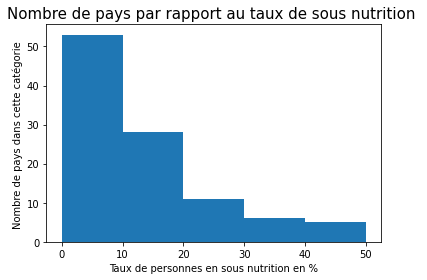

In [118]:
data = mtest['Ratio']

plt.hist(data, bins = [0,10,20,30,40,50])
plt.title('Nombre de pays par rapport au taux de sous nutrition ', fontsize=15)
plt.xlabel('Taux de personnes en sous nutrition en %')
plt.ylabel('Nombre de pays dans cette catégorie ')
plt.show()

##### Graphique des dix pays ayant le taux de sous-nutrition le plus élevé 

In [119]:
mt=mtesttri.head(10)

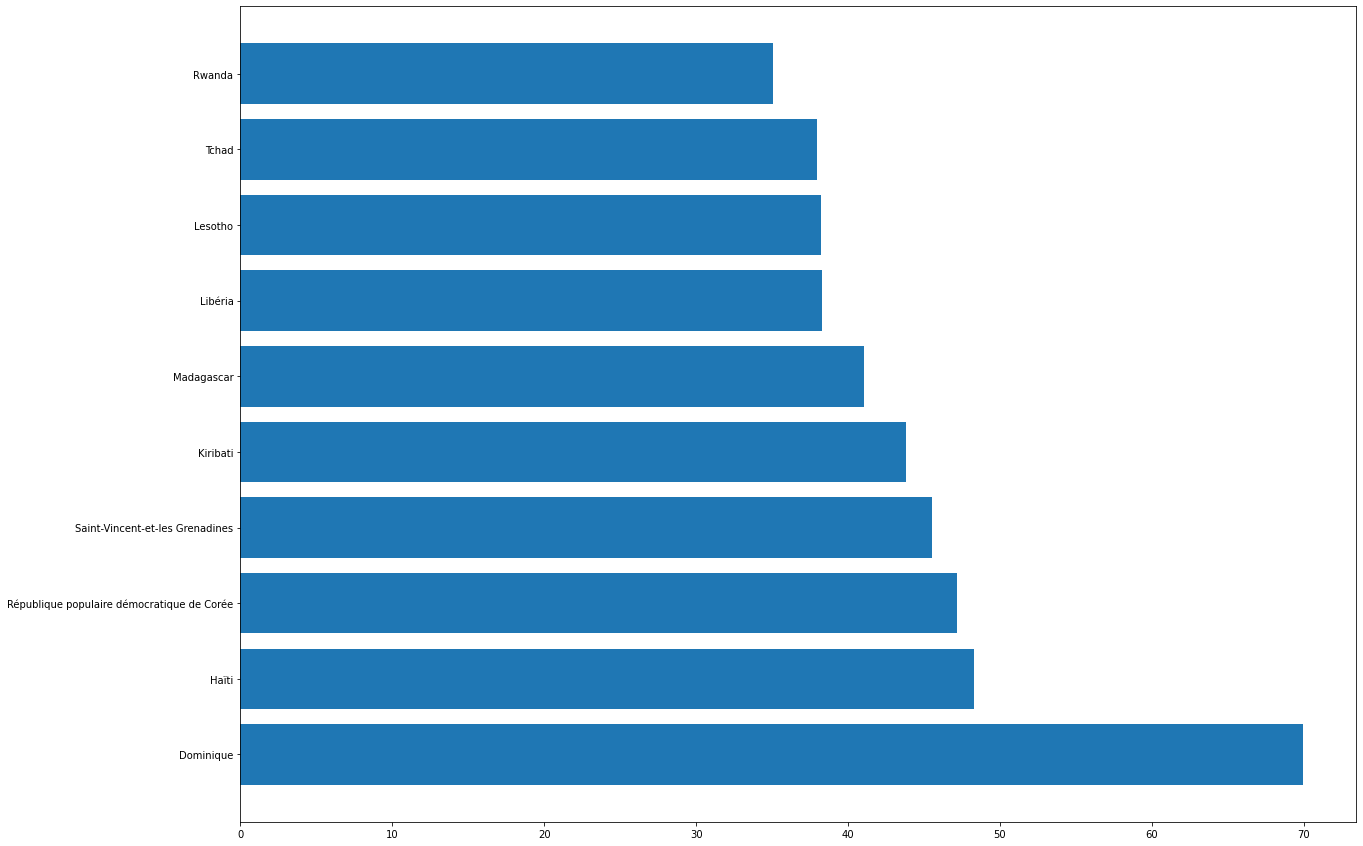

In [120]:
plt.figure(figsize=(20,15))
names =mt['Zone'] # nom des barres
values = mt['Ratio']

plt.barh(names, values) ; plt.show() # Tracer

#### Calcul du cumul des aides par pays depuis 2013

In [121]:
aidecomp=aide[['Pays bénéficiaire','Valeur']]
aidecumul=aidecomp.groupby(['Pays bénéficiaire'])['Valeur'].agg('sum')
aidecumul=pd.DataFrame(aidecumul)
aidecumul['Pays']=aidecumul.index # Les pays ayant été stockés en index il faut donc recréer une collone

In [122]:
aidecumul=aidecumul.sort_values(by=['Valeur'],ascending=False)

In [123]:
aidecumul=aidecumul.head(10)

In [124]:
aidecumul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, République arabe syrienne to Niger
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Valeur  10 non-null     int64 
 1   Pays    10 non-null     object
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


[Text(0.5, 0, 'Cumul des aides alimentaires en million de tonne'),
 Text(0, 0.5, 'Pays'),
 Text(0.5, 1.0, 'Cumul des aides alimentaires de 2013 à 2016')]

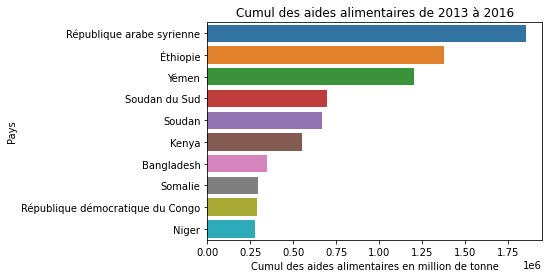

In [125]:

ax=sns.barplot(x='Valeur', y='Pays', data=aidecumul)
ax.set(xlabel='Cumul des aides alimentaires en million de tonne', ylabel='Pays',title='Cumul des aides alimentaires de 2013 à 2016')

#### Classement des pays ayant le plus/le moins de disponibilité alimentaire

In [126]:
plusdispo=dispopays.sort_values(by=['Disponibilité alimentaire (Cal/personne/jour)'],ascending=False)

In [127]:
plus=plusdispo.head(10)

In [128]:
moinsdispo=dispopays.sort_values(by=['Disponibilité alimentaire (Cal/personne/jour)'],ascending=True)

In [129]:
moins=moinsdispo.head(10)

In [130]:
frames = [plus,moins]

result = pd.concat(frames)

In [131]:
result['Zone']=result.index

[Text(0.5, 0, 'Disponibilité alimentaire'),
 Text(0, 0.5, 'Pays'),
 Text(0.5, 1.0, 'Différence entre les pays ayant le plus/moins de disponibilité alimentaire')]

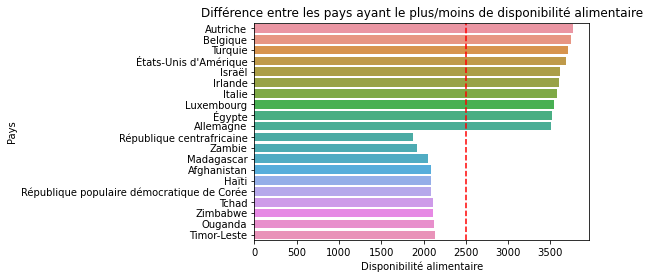

In [132]:
ax=sns.barplot(x='Disponibilité alimentaire (Cal/personne/jour)', y='Zone', data=result)
plt.axvline(x=2500,color='red',linestyle='--')
ax.set(xlabel='Disponibilité alimentaire', ylabel='Pays',title='Différence entre les pays ayant le plus/moins de disponibilité alimentaire')